# Seaborn

Seaborn is an additional library that sits on top of Matplotlib. [This](https://www.geeksforgeeks.org/difference-between-matplotlib-vs-seaborn/) article can help to demystify the differences. Know that you cannot really use _only_ Seaborn. The Seaborn package has functions to produce some very nice plots using considerably less lines of code than what achieving the same result in Matplotlib would require. However, it isn't very customizable on its own - you will still need to add most customization options to a Seaborn plot _through_ the Matplotlib library. 

Make sure the `seaborn` package is installed in the Conda environment for your project.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tips = sns.load_dataset('tips')

In [16]:
# print(tips.to_string())
tips.head()
tips["day"].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

## Distribution Plots

Let's discuss some plots that allow us to visualize the distribution of a data set. These plots include:

* displot
* kdeplot
* jointplot
* pairplot
* rugplot

Use a displot, kdeplot, or rugplot to show the distribution of a univariate (single variable) set. Use a jointplot to show distribution of a bivariate (two variable) set. Use a pairplot to automate a multivariate matrix of all numerical variables.  

In [ ]:
# sns.set_theme(style="whitegrid")
sns.set_theme(style="ticks")

### Displot

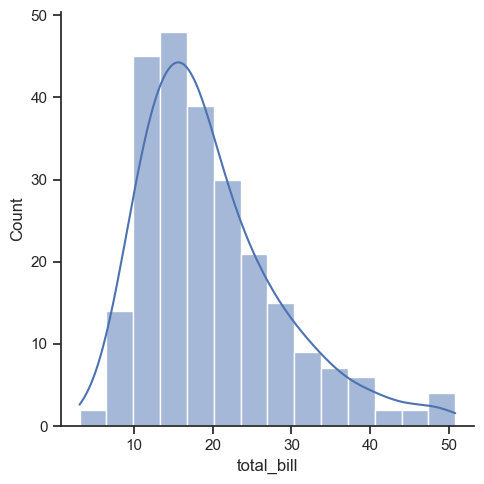

In [22]:
# sns.displot(tips['total_bill'])
sns.displot(data = tips, x='total_bill', kde=True) # kde=True to add kde line

Customize the number of bins:

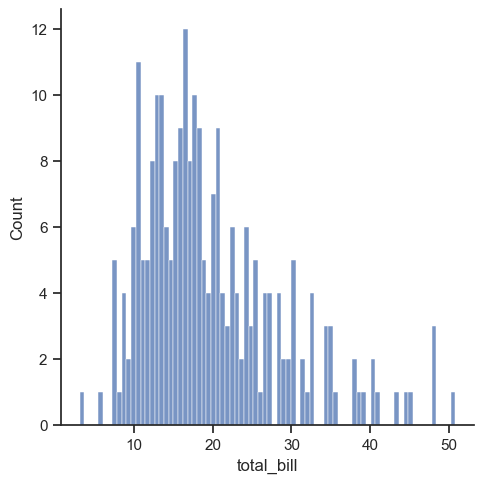

In [23]:
sns.displot(tips['total_bill'], bins=80)

### KDE plot

<Axes: xlabel='total_bill', ylabel='Density'>

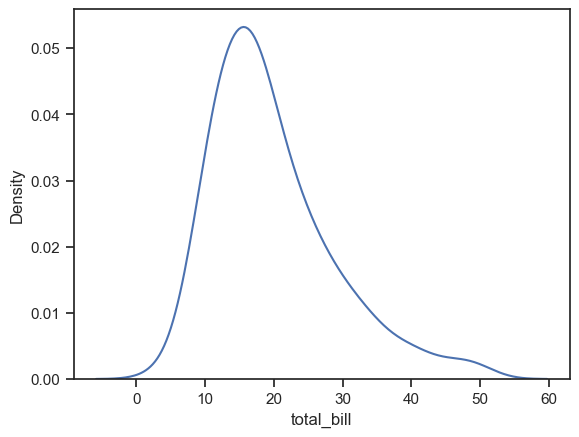

In [26]:
# sns.displot(tips['total_bill'], kind="kde")
sns.kdeplot(tips['total_bill'])

### Rugplot

Rugplots are actually a very simple concept, they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot:

<Axes: xlabel='total_bill'>

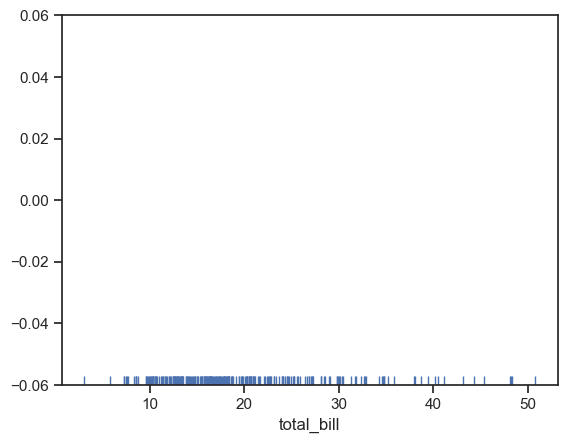

In [27]:
sns.rugplot(tips['total_bill'])

### Jointplot

Jointplot combines two different distribution plots and should be used for bivariate analysis. Customize the plots with the **kind** parameter:
* “scatter”
* “reg”
* “resid”
* “kde”
* “hex”

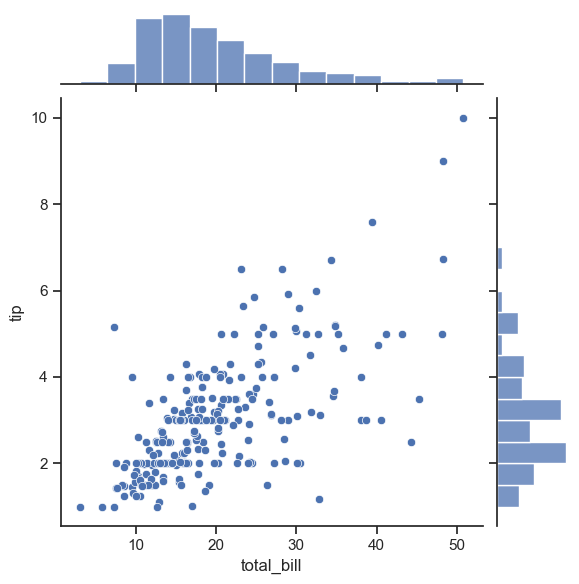

In [28]:
sns.jointplot(data=tips, x='total_bill', y='tip')

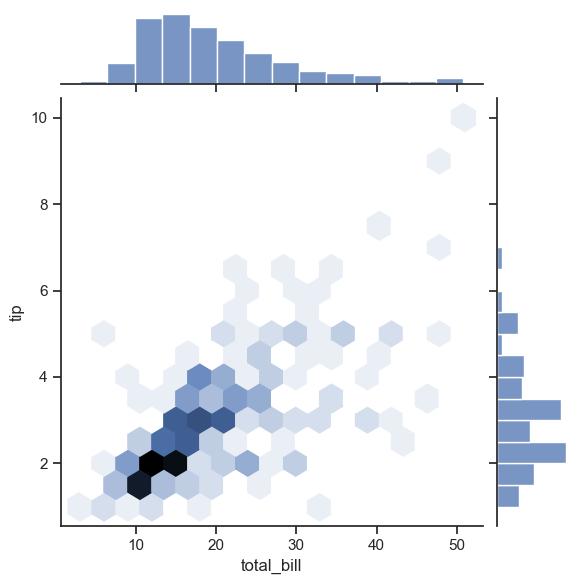

In [29]:
sns.jointplot(x=tips['total_bill'], y=tips['tip'], kind='hex')

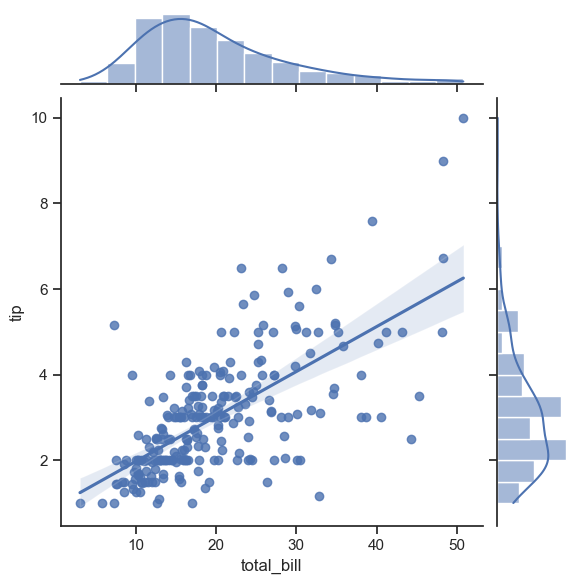

In [30]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg')


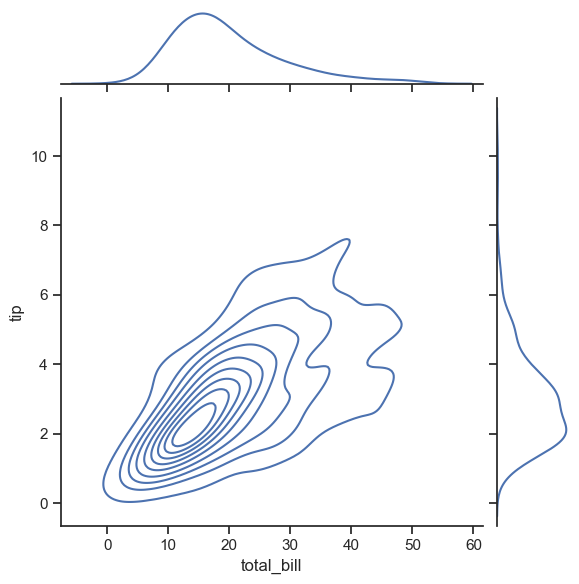

In [31]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde')

### Pairplot

Pairplots will plot pairwise relationships across an entire DataFrame (for numerical columns), and support a color `hue` argument (for categorical columns).

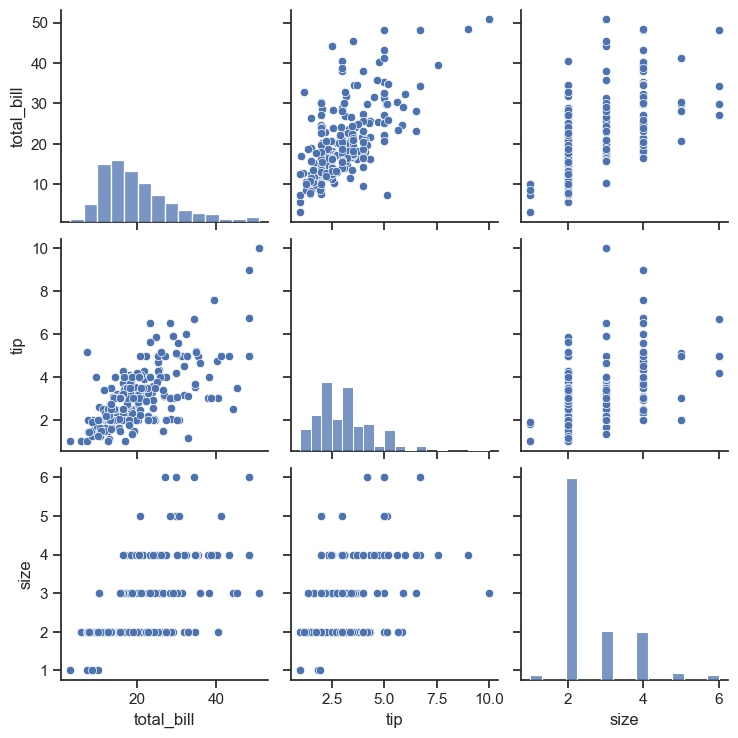

In [35]:
sns.pairplot(tips)
# sns.pairplot(tips[["size", "tip"]])
plt.show()

In [36]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


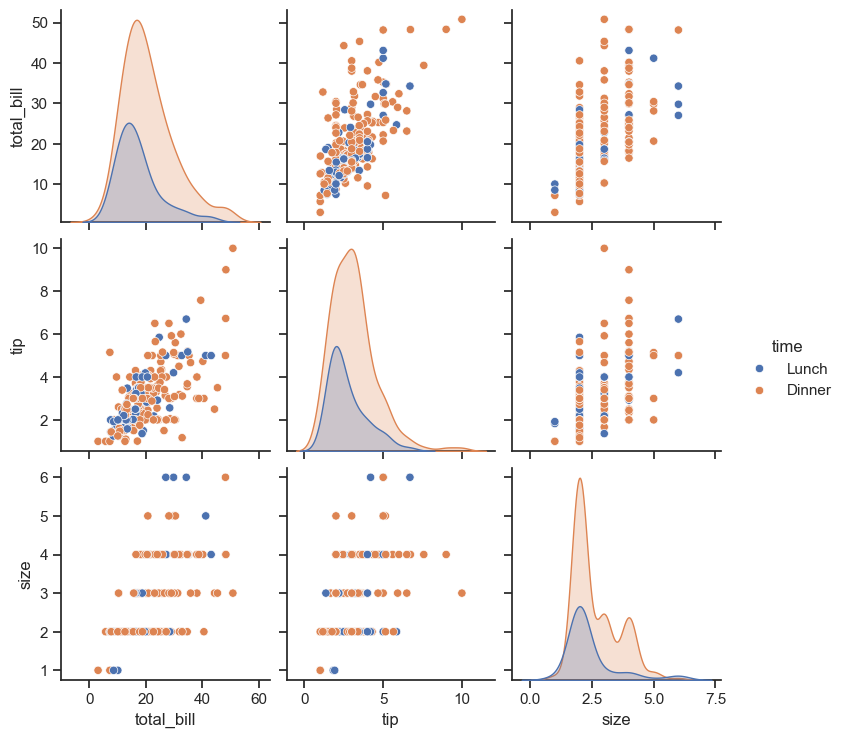

In [37]:
sns.pairplot(tips, hue='time')

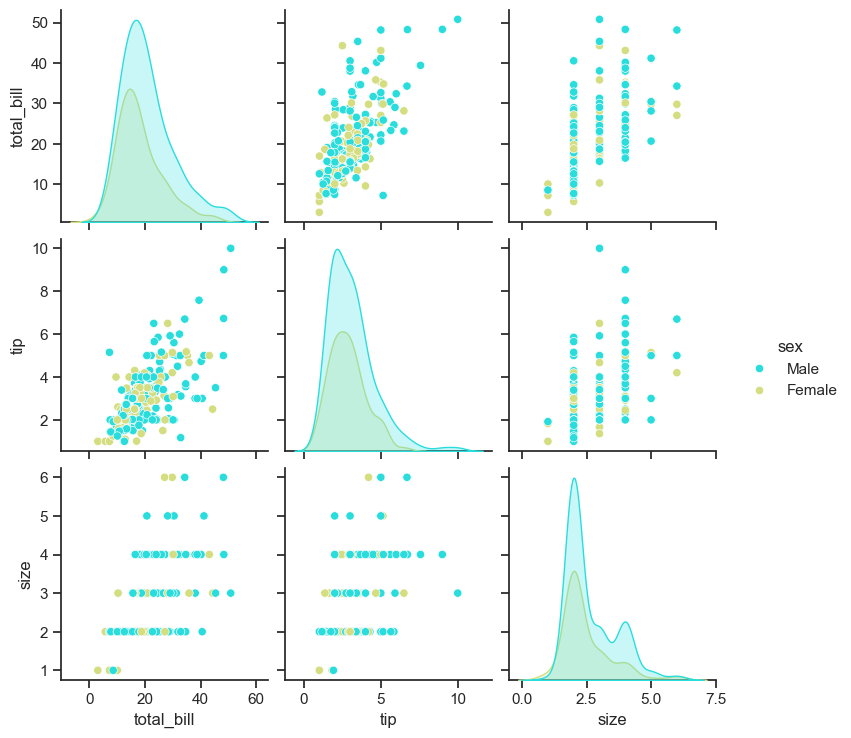

In [39]:
sns.pairplot(tips, hue='sex', palette='rainbow')
# for more palette options, visit: https://matplotlib.org/stable/users/explain/colors/colormaps.html

## Categorical Data Plots

Now let's discuss using Seaborn to plot categorical data! There are a few main plot types for this:

* factorplot
* boxplot
* violinplot
* stripplot
* swarmplot
* barplot
* countplot

Let's go through examples of each!

### Barplot and Countplot

These very similar plots allow you to get aggregate data off a categorical feature in your data. **Barplot** is a general plot that allows you to aggregate categorical data via an "estimator" function, by default the mean:

<Axes: xlabel='time', ylabel='total_bill'>

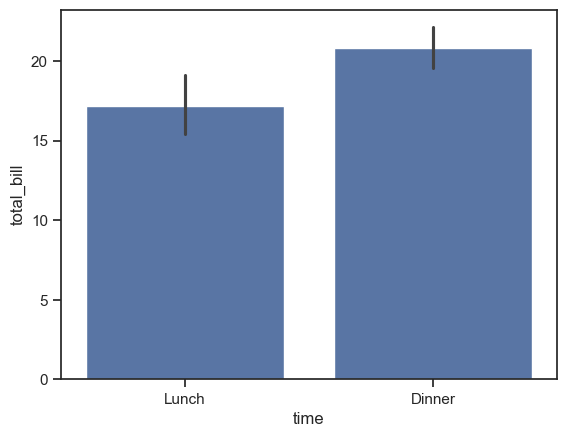

In [ ]:
sns.barplot(data=tips, x='time', y='total_bill')

You can change the estimator to your own function that converts a vector to a scalar (i.e. aggregates the values):

<Axes: xlabel='sex', ylabel='total_bill'>

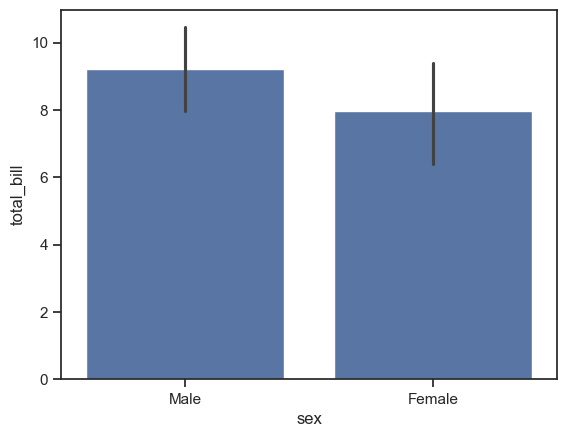

In [41]:
import numpy as np

# use an estimator to see what is the standard deviation of the total bill column per category
sns.barplot(x= 'sex', y= 'total_bill', data= tips, estimator=np.std)

**Countplot** is essentially the same as barplot, except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value:

<Axes: xlabel='sex', ylabel='count'>

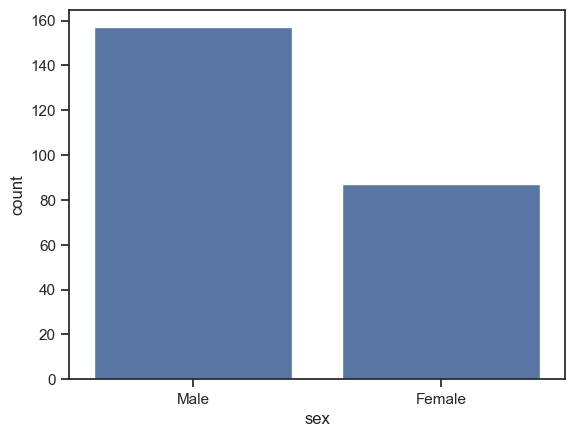

In [42]:
sns.countplot(x= 'sex', data = tips)

### Boxplot and Violinplot

Boxplots and violinplots are used to show the distribution of categorical data. A **boxplot** (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

<Axes: xlabel='day', ylabel='total_bill'>

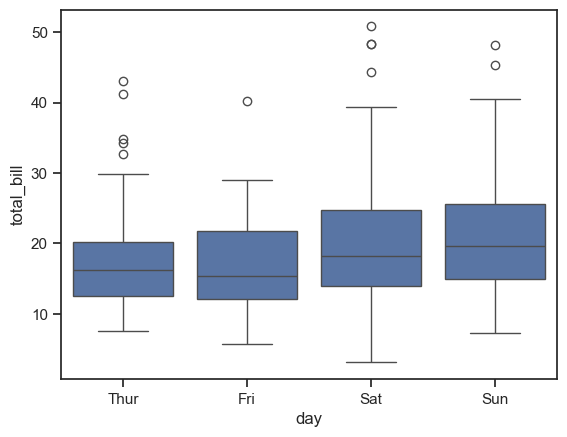

In [43]:
sns.boxplot(x='day', y='total_bill', data=tips)

<Axes: xlabel='day', ylabel='total_bill'>

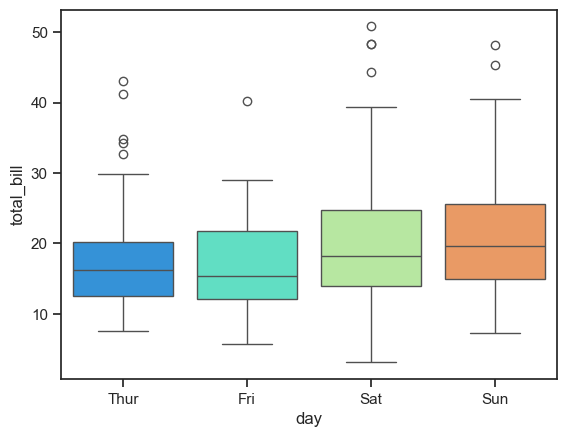

In [44]:
sns.boxplot(x="day", y="total_bill", data=tips, hue="day", palette="rainbow")

<Axes: >

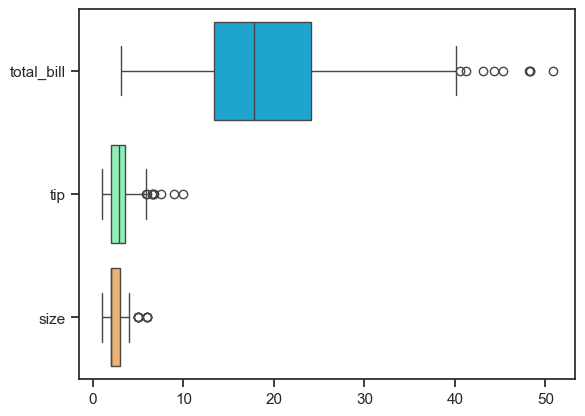

In [45]:
sns.boxplot(data=tips, palette='rainbow', orient='h')

<Axes: xlabel='day', ylabel='total_bill'>

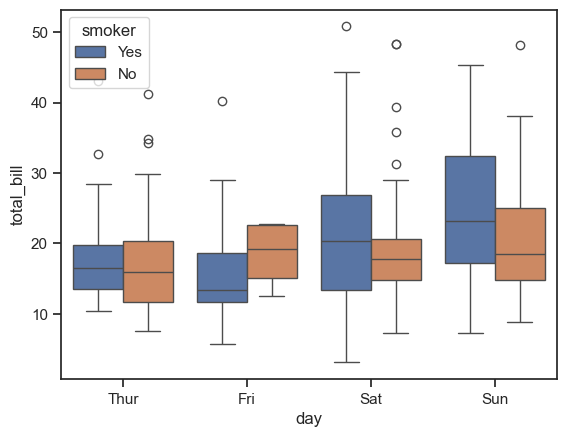

In [46]:
# get a bit fancy
sns.boxplot(x='day', y='total_bill', data=tips, hue='smoker')

A **violin plot** plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual data points, the violin plot features a kernel density estimation of the underlying distribution.

<Axes: xlabel='day', ylabel='total_bill'>

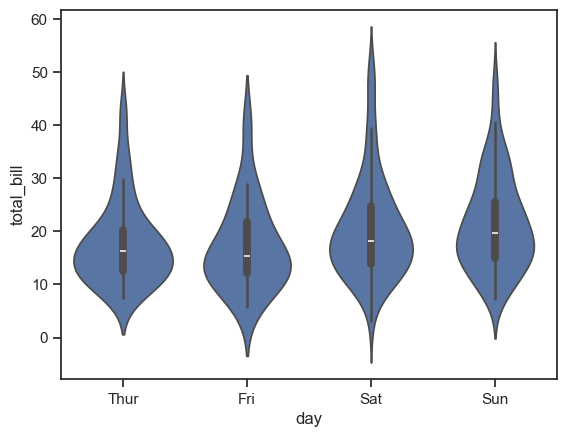

In [47]:
sns.violinplot(x='day', y='total_bill', data=tips)

<Axes: xlabel='day', ylabel='total_bill'>

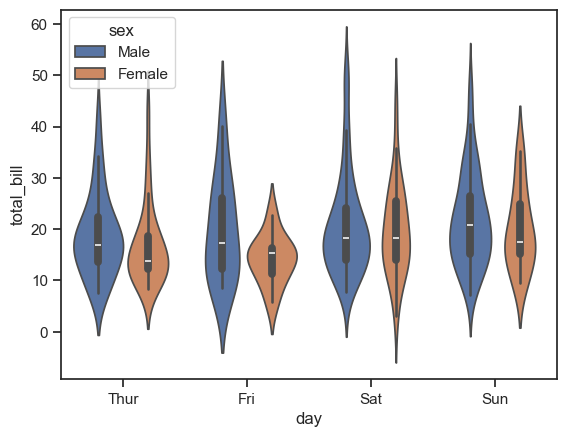

In [48]:
sns.violinplot(x='day', y='total_bill', data=tips, hue='sex')

<Axes: xlabel='day', ylabel='total_bill'>

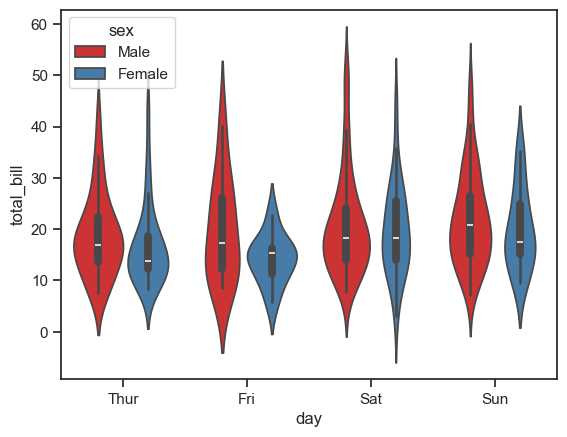

In [49]:
sns.violinplot(x="day", y="total_bill", data=tips, hue='sex', palette='Set1')

<Axes: xlabel='day', ylabel='total_bill'>

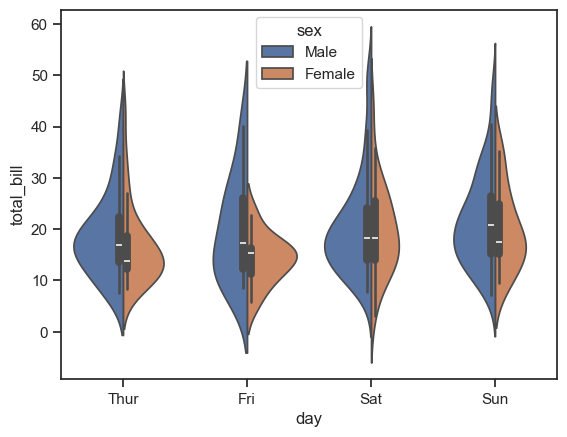

In [50]:
# advanced visualisation
sns.violinplot(x='day', y='total_bill', data=tips, hue='sex', split=True)

## Stripplot and Swarmplot

The **stripplot** will draw a scatterplot where one variable is categorical. A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

The **swarmplot** is similar to stripplot, but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them).

<Axes: xlabel='day', ylabel='total_bill'>

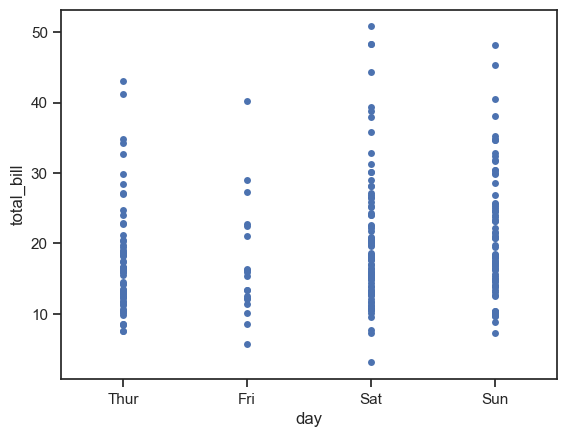

In [51]:
sns.stripplot(x='day', y='total_bill', data=tips, jitter=False)

If many points are stacked on top of each other, it can be quite hard to interpret. Set jitter to see the density a little better:

<Axes: xlabel='day', ylabel='total_bill'>

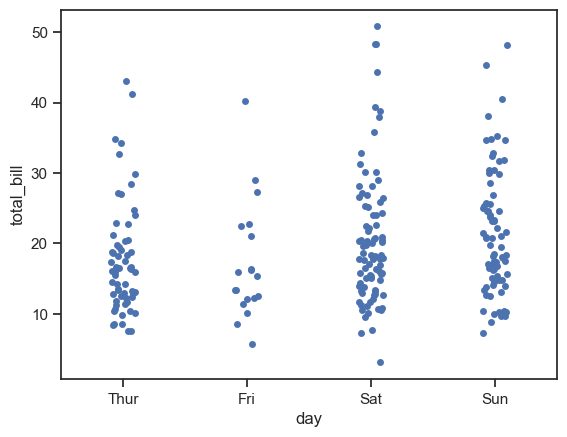

In [52]:
sns.stripplot(x='day', y='total_bill', data=tips)

<Axes: xlabel='sex', ylabel='total_bill'>

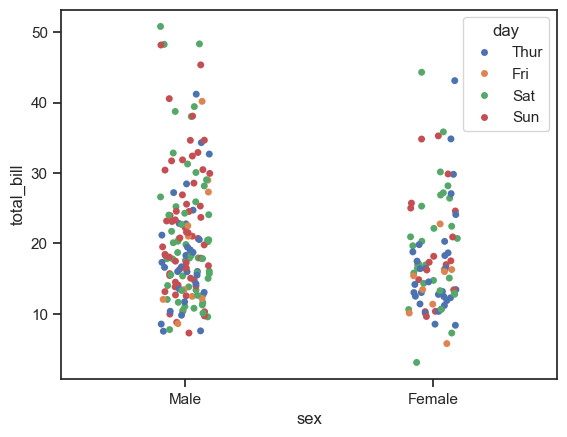

In [54]:
sns.stripplot(x='sex', y='total_bill', data=tips, hue='day')

<Axes: xlabel='sex', ylabel='total_bill'>

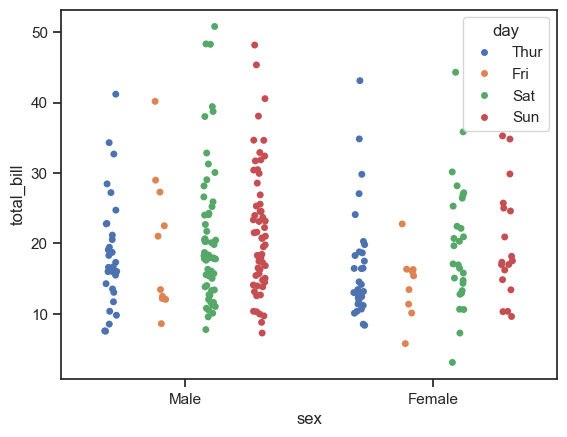

In [56]:
sns.stripplot(x='sex', y='total_bill', data=tips, hue='day', dodge=True)

## Combining Categorical Plots

A **swarm plot** is essentially a combination of a strip plot and a violent plot. It shows the same distribution, except it's actually showing all the points themselves. In general, however, probably avoid showing swarm plots without explanation, since most people probably haven't encountered them before.

<Axes: xlabel='day', ylabel='total_bill'>

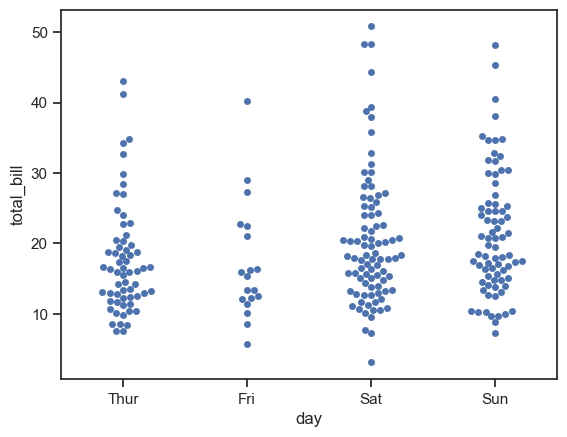

In [57]:
sns.swarmplot(x='day', y='total_bill', data=tips)

<Axes: xlabel='day', ylabel='total_bill'>

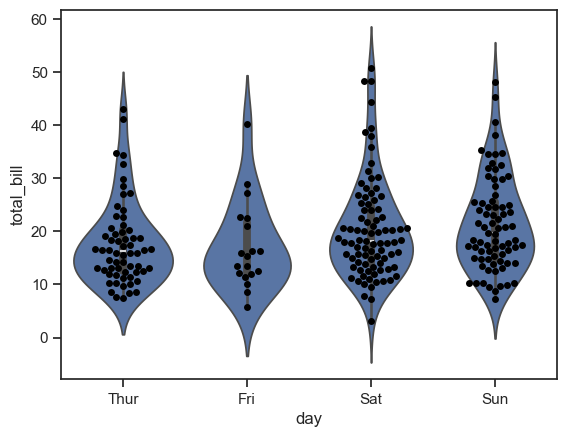

In [58]:
#This is probably not useful for presentation but maybe just for exploratory data analysis
sns.violinplot(x='day', y='total_bill', data=tips)
sns.swarmplot(x='day', y='total_bill', data=tips, color='black')

<Axes: xlabel='tip', ylabel='day'>

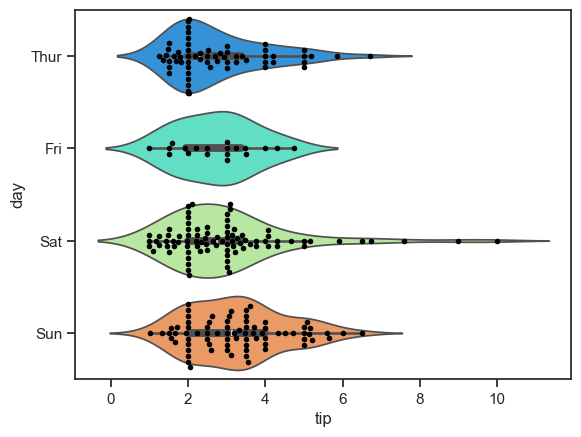

In [62]:
sns.violinplot(x="tip", y="day", data=tips, palette='rainbow', hue="day")
sns.swarmplot(x="tip", y="day", data=tips, color='black', size=4)

### Catplot (Factorplot)

A **catplot** is the most general form of a categorical plot (it was renamed from factorplot to catplot in Seaborn 0.9). It can take in a **kind** parameter to adjust the plot type:

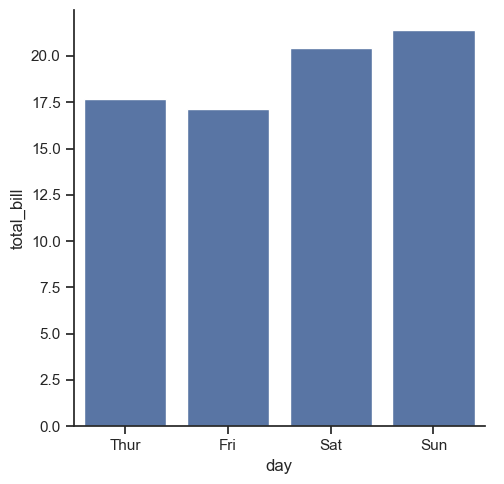

In [64]:
sns.catplot(x='day', y='total_bill', data=tips, kind='bar', errorbar=None)

# Regression Plots

Seaborn has many built-in capabilities for regression plots, however we won't really discuss regression until the machine learning section of the course, so we will only cover the **lmplot()** function for now.

**lmplot** allows you to display linear models, but it also conveniently allows you to split up those plots based off of features, as well as coloring the hue based off of features.

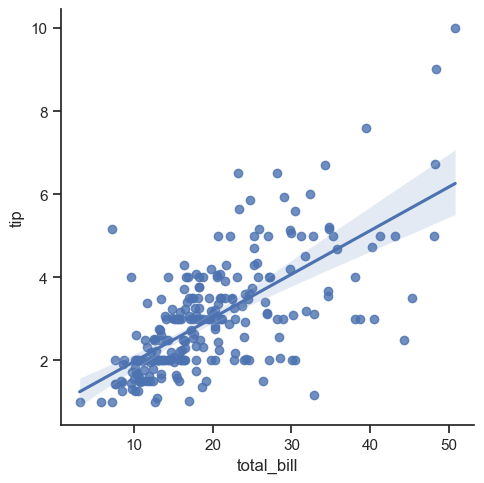

In [65]:
sns.lmplot(x='total_bill', y='tip', data=tips)

### Working with Markers

lmplot kwargs get passed through to **regplot** which is a more general form of lmplot(). regplot has a scatter_kws parameter that gets passed to plt.scatter. So you want to set the s parameter in that dictionary, which corresponds (a bit confusingly) to the squared marker-size. In other words, you end up passing a dictionary with the base matplotlib arguments, in this case, s for size of a scatter plot. In general, you probably won't remember this off the top of your head, but instead reference the [documentation](http://matplotlib.org/api/markers_api.html).

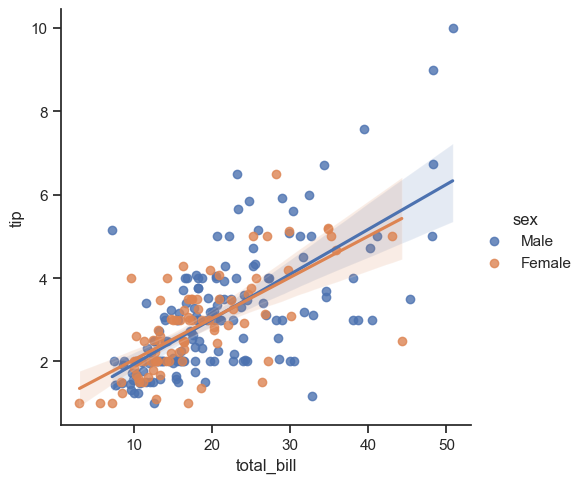

In [66]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex')

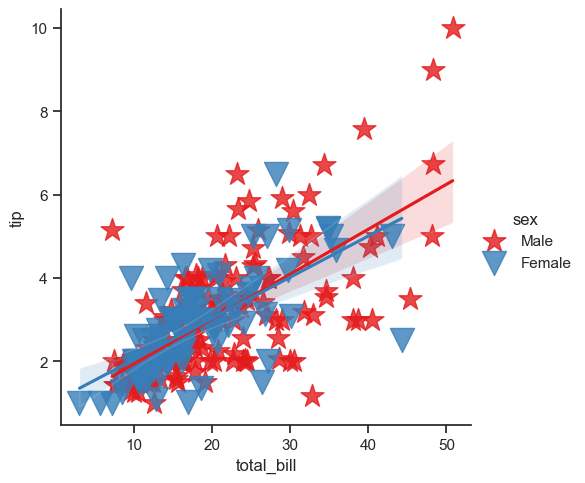

In [67]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', palette='Set1', markers=['*','v'], scatter_kws={'s':300})

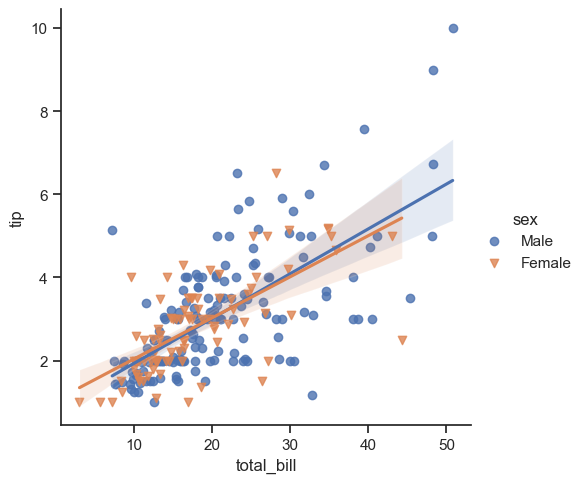

In [94]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', markers=['o', 'v'])

We can add more variable separation through columns and rows with the use of a **grid**. Just indicate this with the col or row arguments:

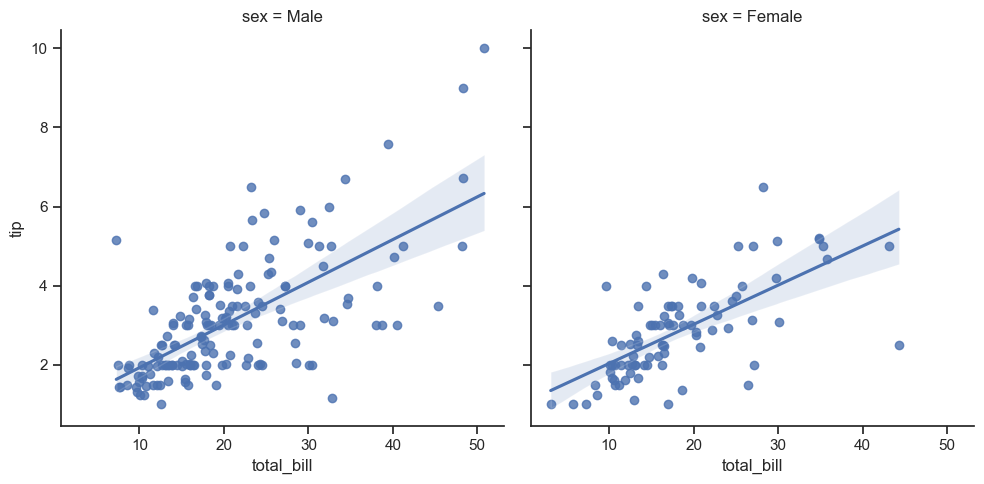

In [73]:
sns.lmplot(x='total_bill', y='tip', data=tips, col='sex')

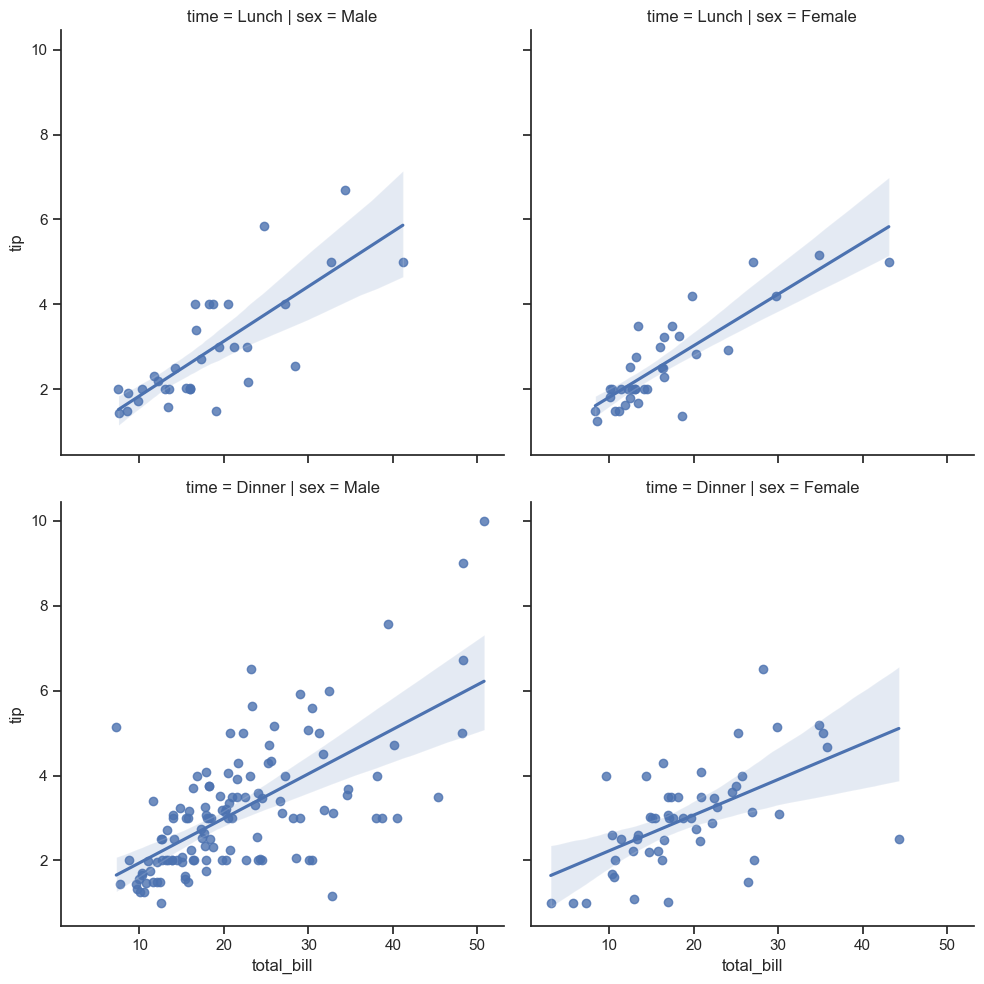

In [71]:
sns.lmplot(x='total_bill', y='tip', data=tips, col='sex', row='time')

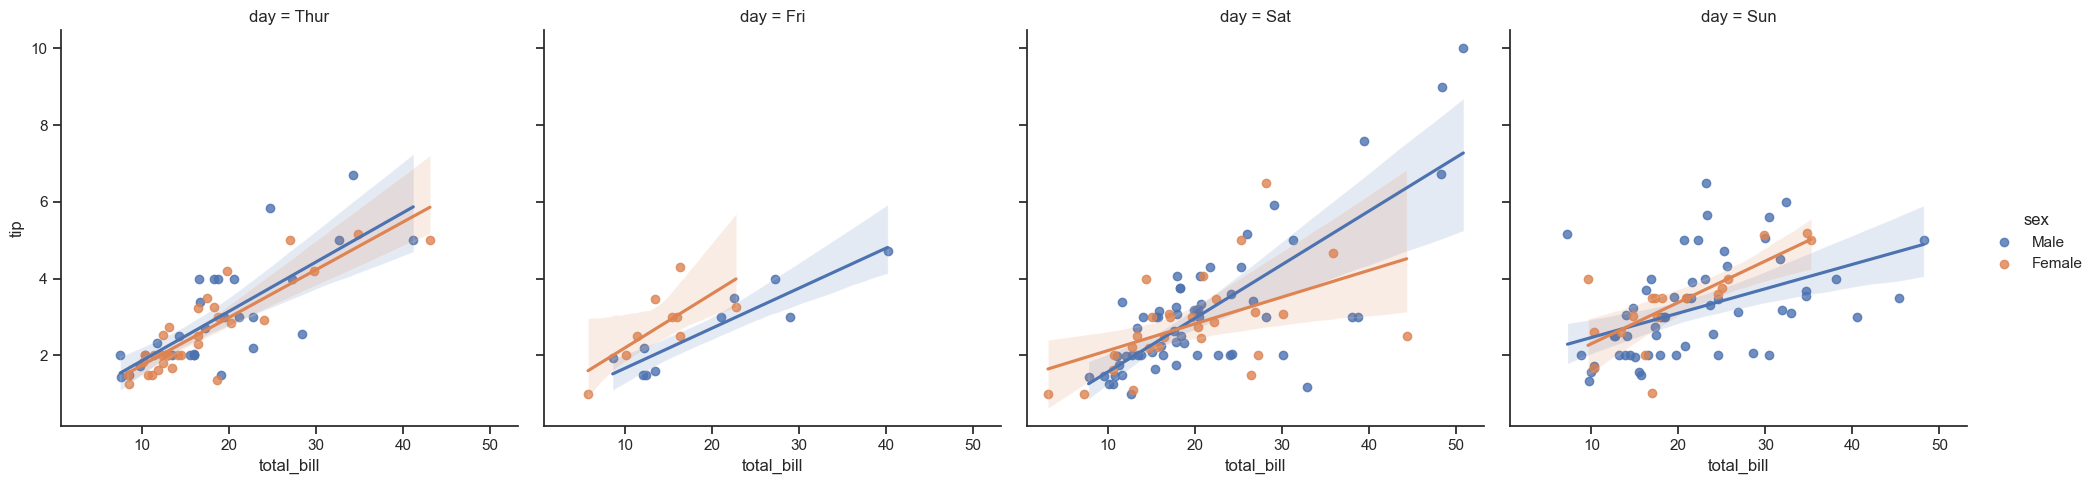

In [72]:
sns.lmplot(x='total_bill', y='tip', data=tips, col='day', hue='sex')

## Aspect and Size

Seaborn figures can have their size and aspect ratio adjusted with the **height** and **aspect** parameters:

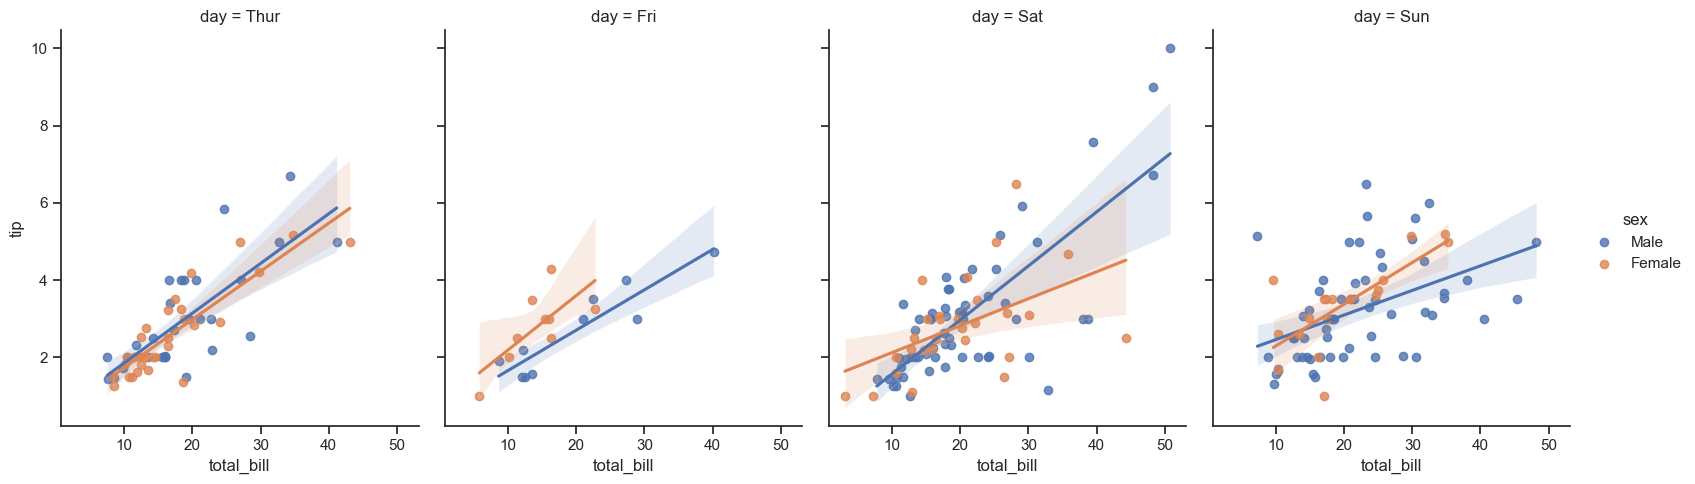

In [78]:
sns.lmplot(x='total_bill', y='tip', data=tips, col='day', hue='sex', aspect=0.8)

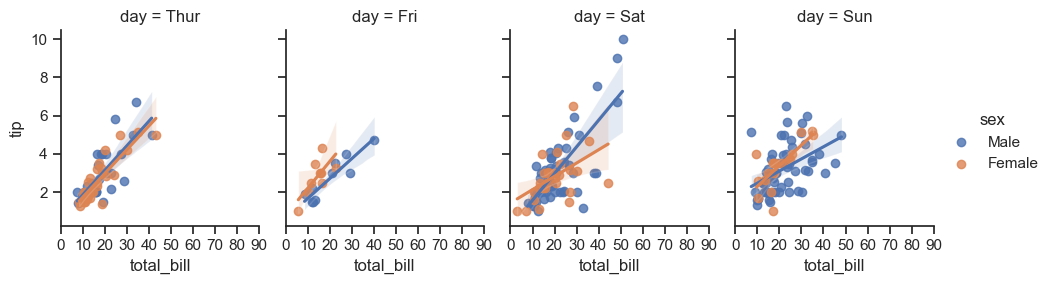

In [90]:
ax = sns.lmplot(x='total_bill', y='tip', data=tips, col='day', hue='sex', aspect=0.8, height=3)
ax.set(xticks=range(0,100,10))

You can use matplotlib's `plt.figure(figsize=(nwidth,nheight))` to change the size of most seaborn plots.

<Axes: xlabel='sex', ylabel='count'>

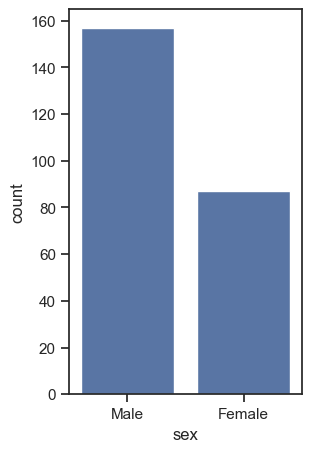

In [95]:
plt.figure(figsize=(3,5))
sns.countplot(data= tips, x='sex')

# Matrix Plots

Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters within the data (later in the machine learning section we will learn how to formally cluster data).

Let's begin by exploring seaborn's heatmap and clustermap:

In [96]:
# import another dataset
flights = sns.load_dataset('flights')

In [98]:
flights.tail()

,year,month,passengers
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390
143,1960,Dec,432


In [99]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


## Heatmap

In order for a heatmap to work properly, your data should already be in a matrix form, the sns.heatmap function just colors it in for you. We will create a [correlation matrix](https://www.w3schools.com/datascience/ds_stat_correlation_matrix.asp), which summarizes the correlation between all numeric features. The heat map colors in those values on a gradient scale. If you have a very large correlation DataFrame, or some other matrix form data, you can easily identify high and low numbers, and where the values are relative to each other.

In [100]:
# separate only numeric features
num_tips = tips.select_dtypes(include='number')
num_tips

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


In [101]:
tc = num_tips.corr()

In [102]:
tc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<Axes: >

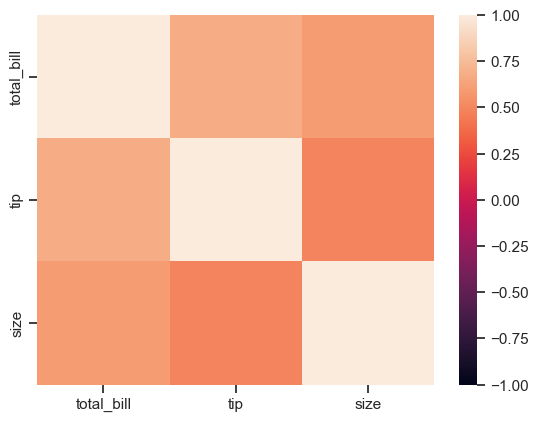

In [103]:
sns.heatmap(tc, vmin=-1)

<Axes: >

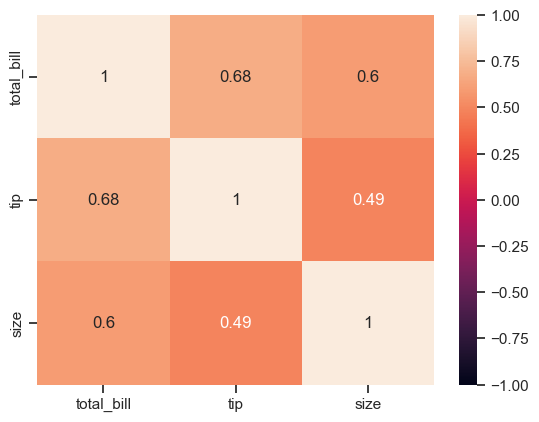

In [104]:
sns.heatmap(tc, annot= True, vmin=-1) #annot=true will add the values as annotations

<Axes: >

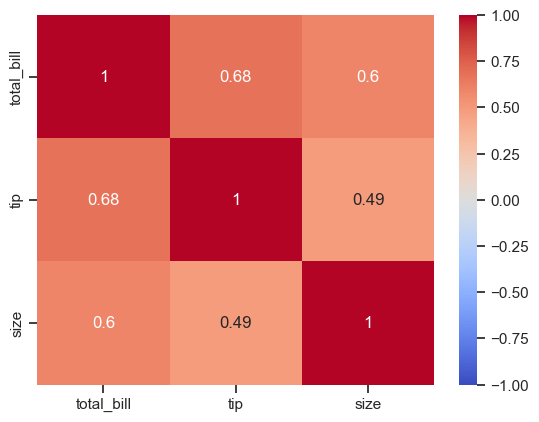

In [105]:
sns.heatmap(tc, annot= True, cmap='coolwarm', vmin=-1)

Or for the flights data:

In [108]:
fp = flights.pivot_table(index='month', columns='year', values='passengers', observed=False) # now I have my data in a matrix form
fp

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


<Axes: xlabel='year', ylabel='month'>

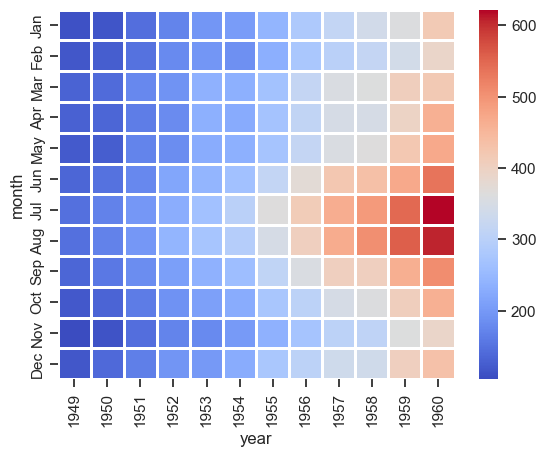

In [109]:
sns.heatmap(fp, cmap='coolwarm', linecolor= 'white', linewidths=1) 

## Clustermap

The cluster map uses hierarchal clustering to produce a clustered version of the heatmap. For example:

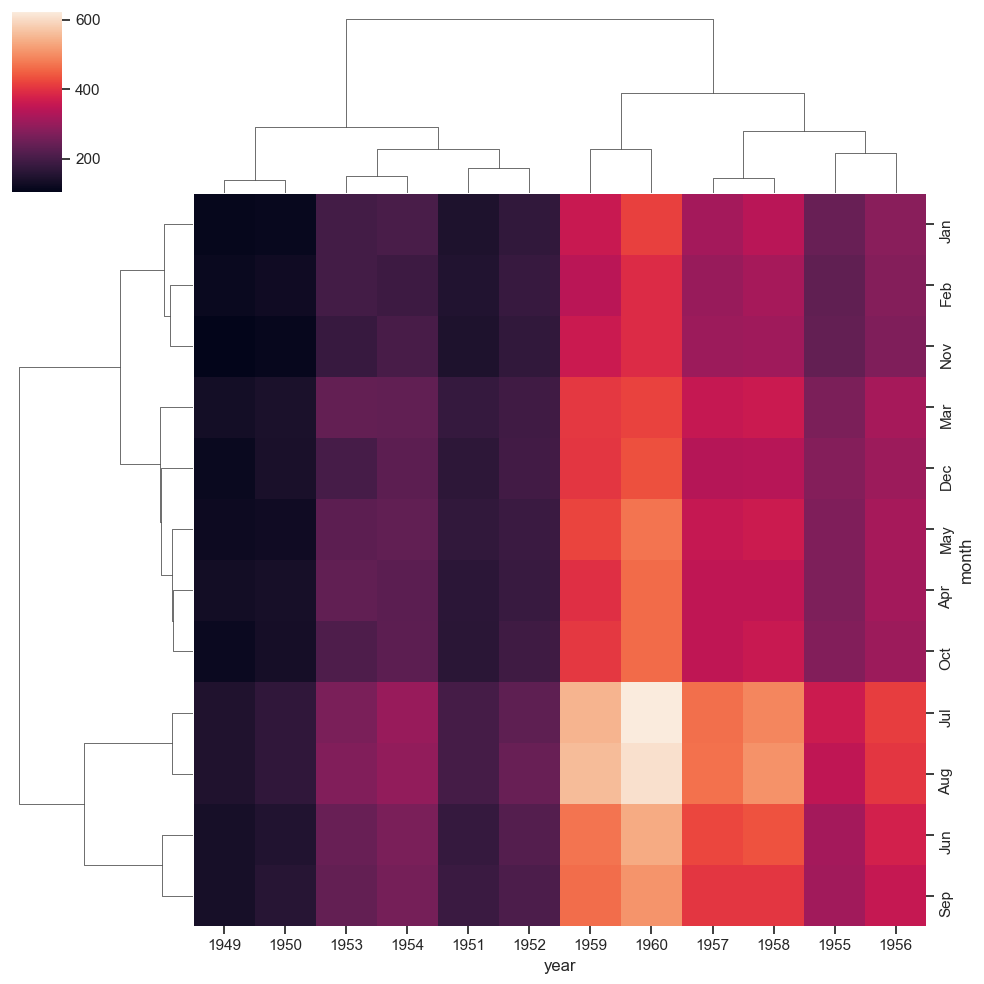

In [110]:
sns.clustermap(fp)

Notice now how the years and months are no longer in order, instead they are grouped by similarity in value (passenger count). That means we can begin to infer things from this plot, such as August and July being similar (makes sense, since they are both summer travel months)

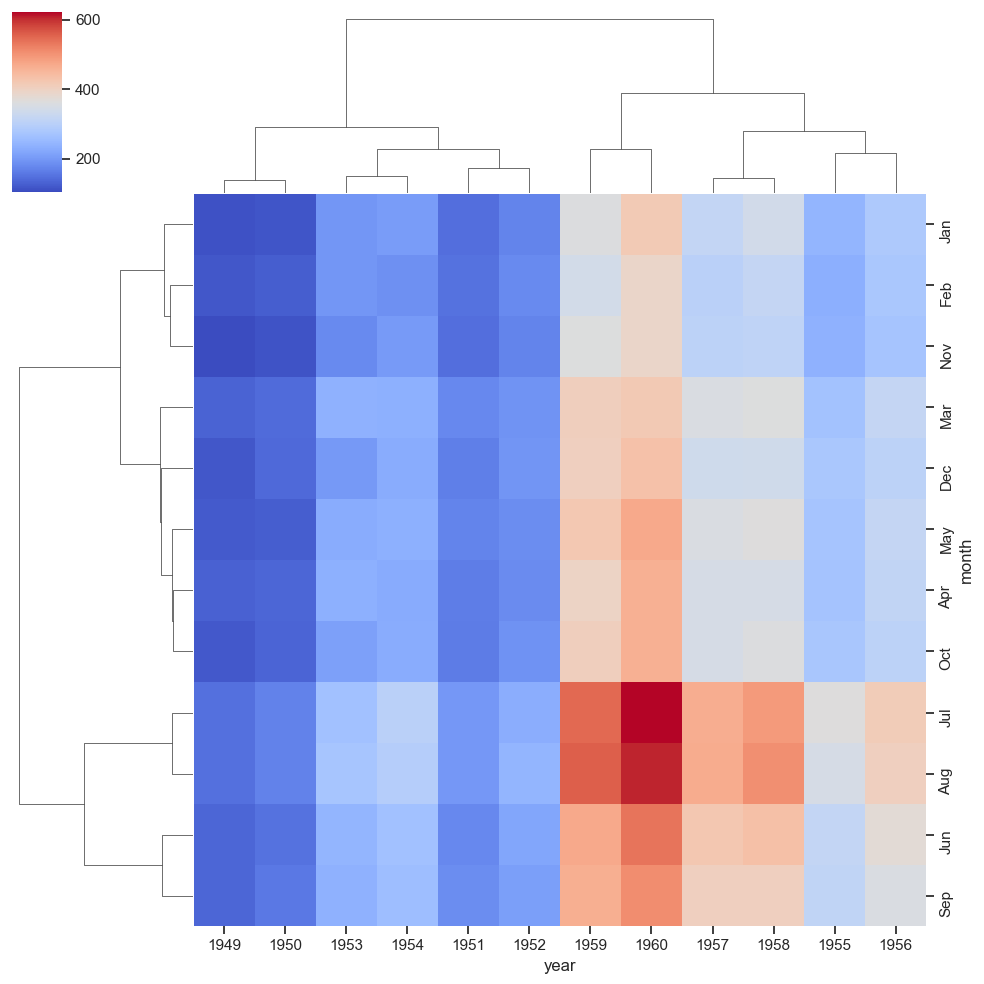

In [111]:
sns.clustermap(fp, cmap='coolwarm')

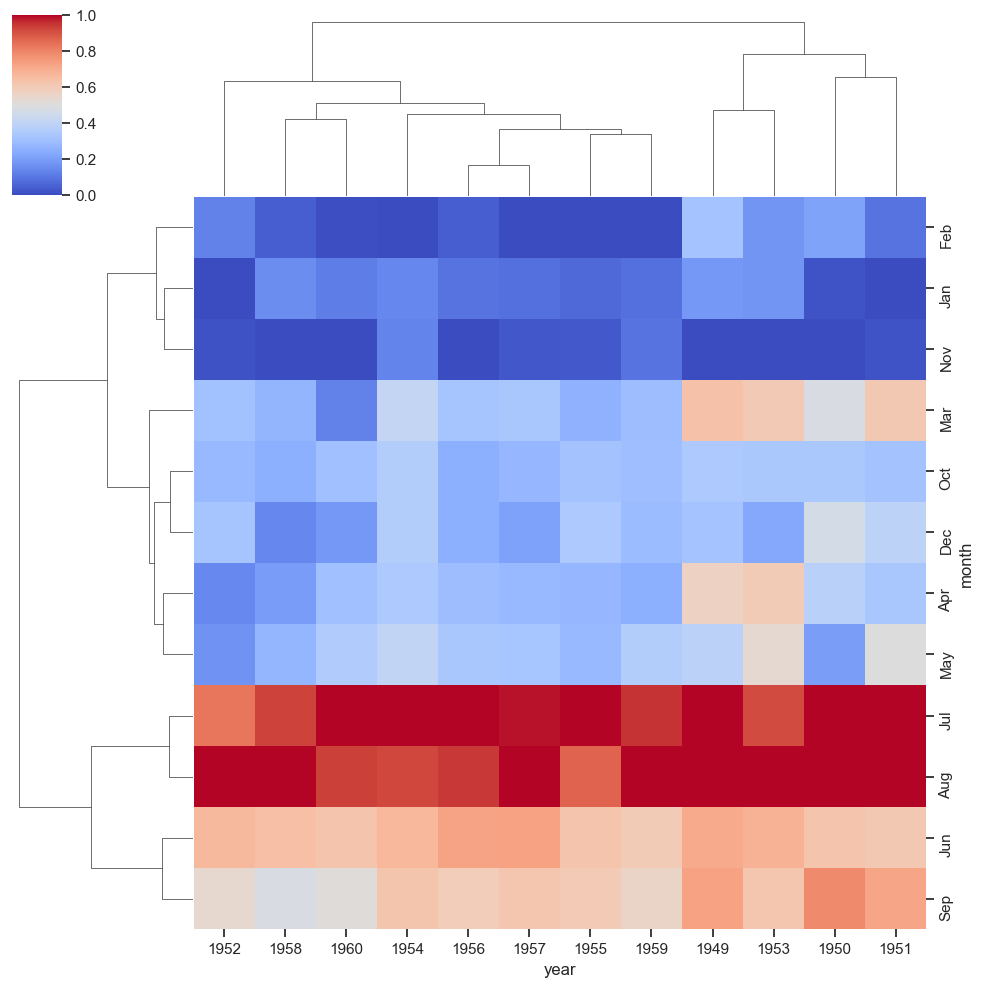

In [112]:
# normalise the scale may be ? pass an argument
sns.clustermap(fp, cmap='coolwarm', standard_scale=1)

I encourage you to explore the documentation for these maps, or any other you're interested in, but you may want to wait until we actually get to machine learning
clustering algorithms so we can better understand what's actually going on with the mathematics behind these methods.

A heat map will display things in the order you put them in.  
A cluster map will cluster things in an order, so that similar groups are close to each other.

## Grids

Grids are general types of plots that allow you to map plot types to rows and columns of a grid, this helps you create similar plots separated by features.

In [113]:
# upload the iris data set. iris dataset is a pretty famous set.
# It's basically just measurements of a bunch of different flowers or irises.
# And the last cone here on species, has three distinct types of values.
iris = sns.load_dataset('iris')

In [114]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [115]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

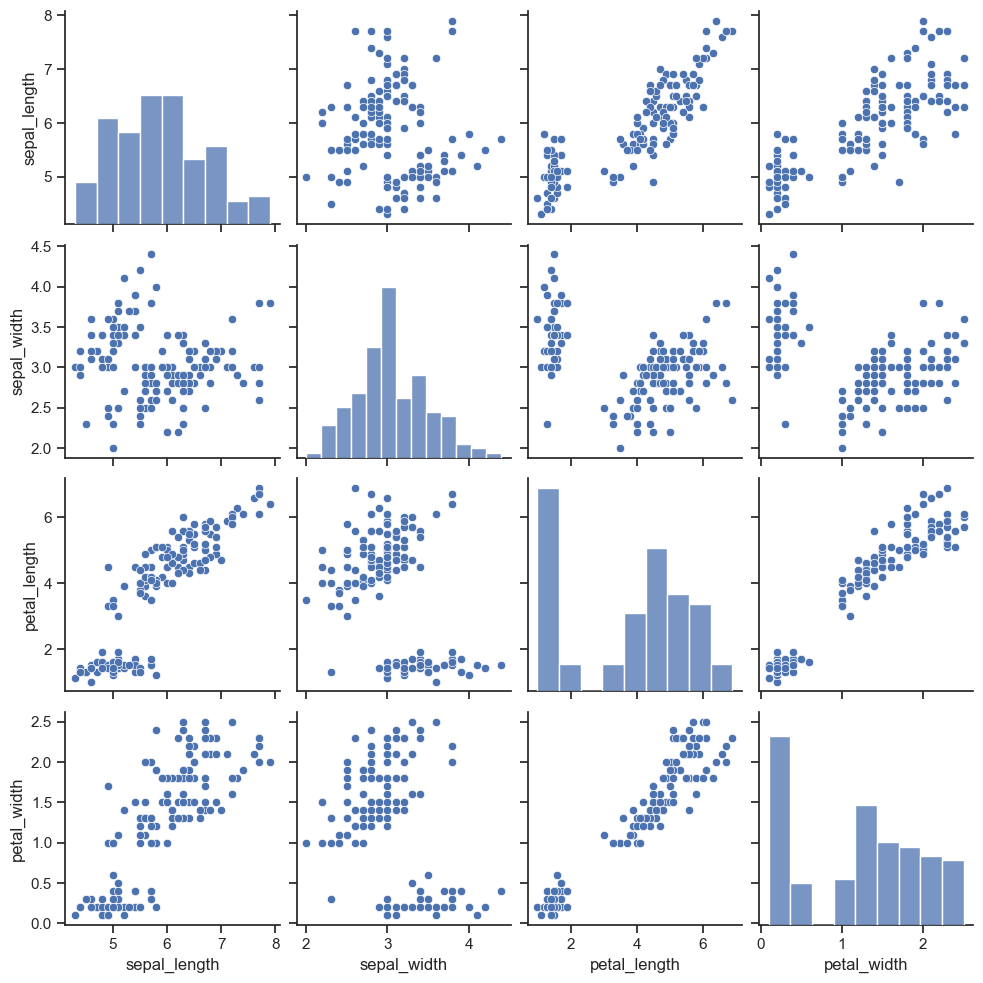

In [116]:
sns.pairplot(iris)

## PairGrid

Pairgrid is a subplot grid for plotting pairwise relationships in a dataset. Rather than the automatic generation of a pair plot, pair grid gives the ability to customize the pair plot for a lot more control over each cell.

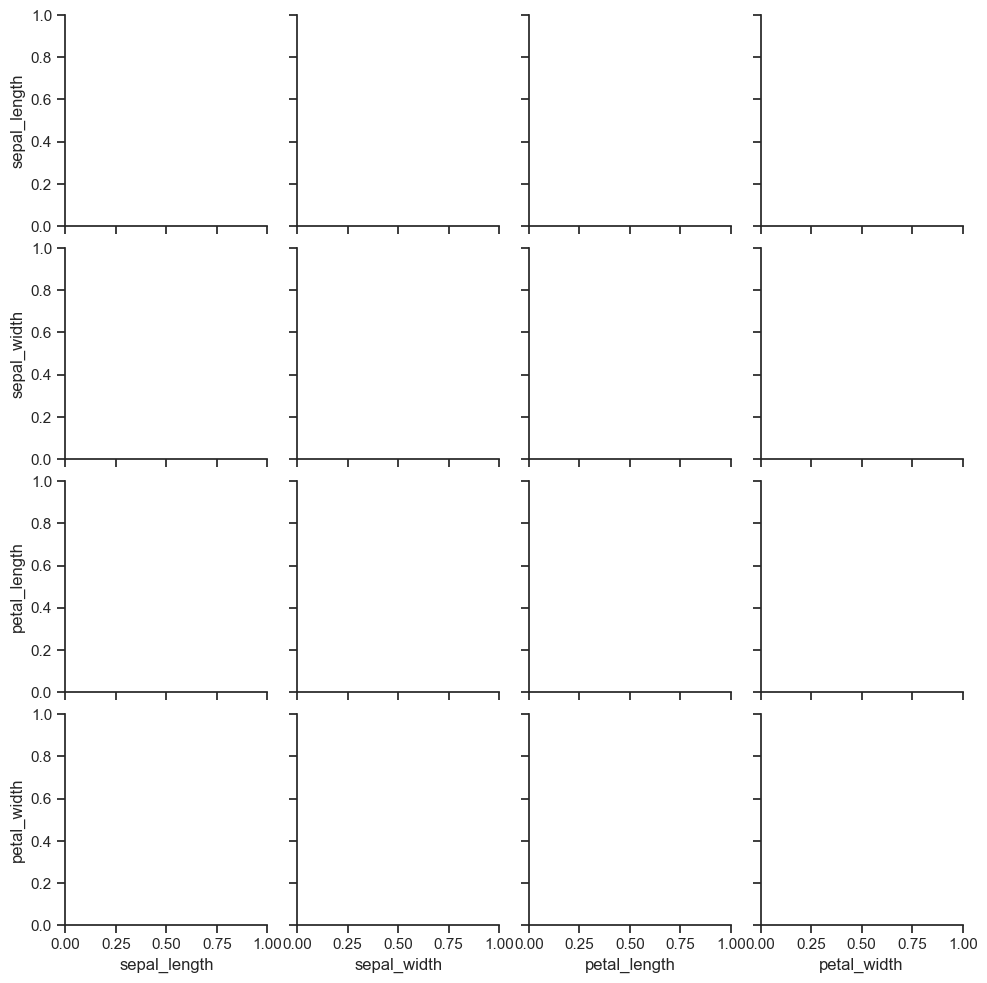

In [117]:
sns.PairGrid(iris)

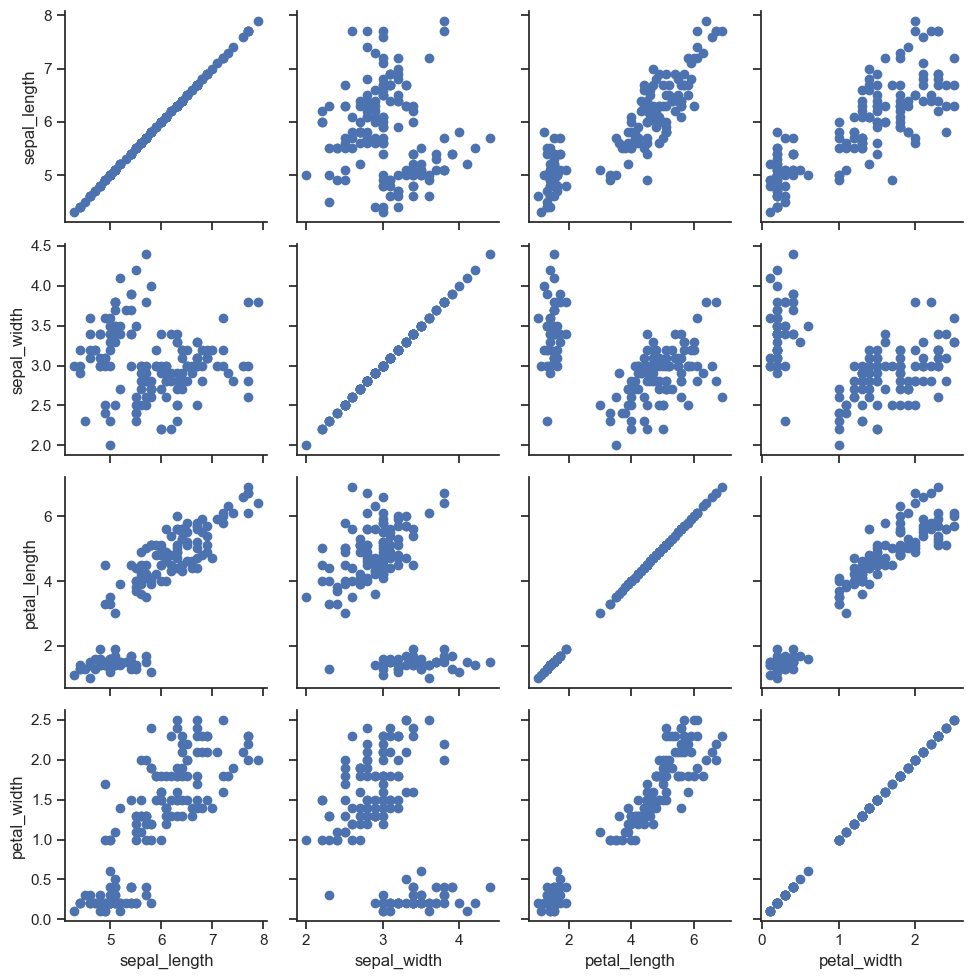

In [118]:
# Then you map to the grid
g = sns.PairGrid(iris)
g.map(plt.scatter)

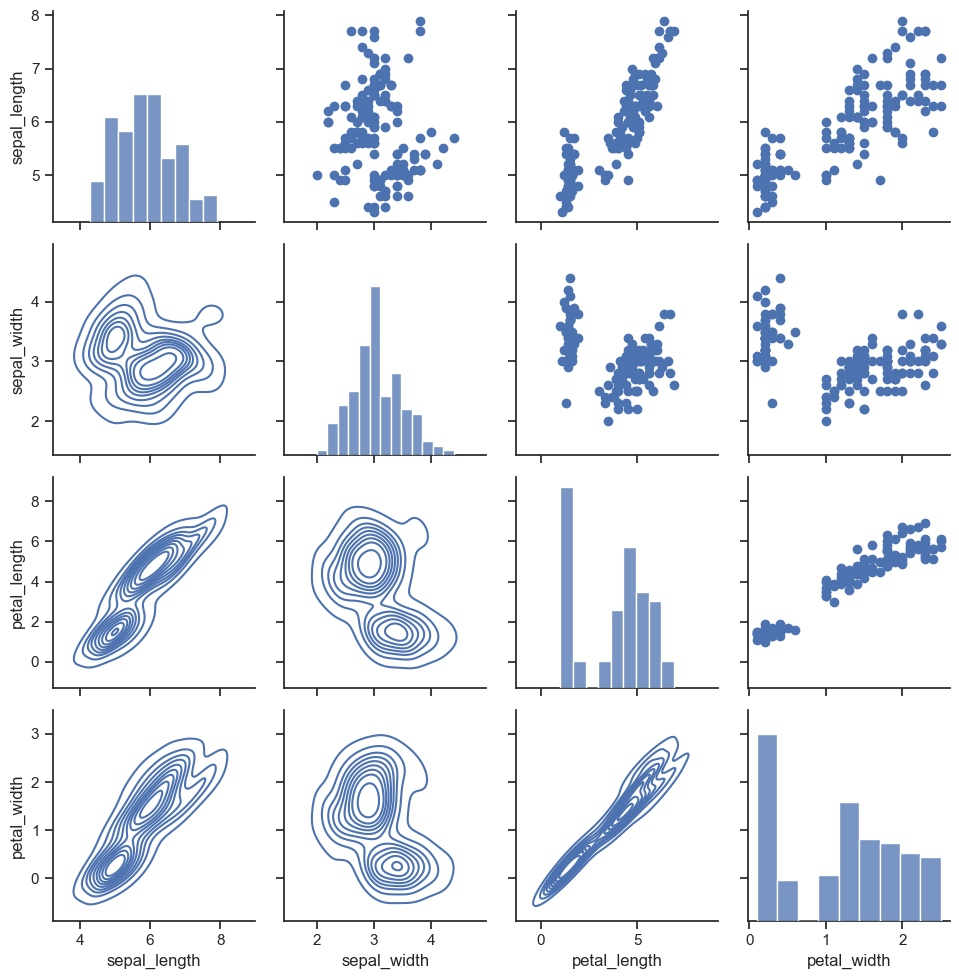

In [119]:
# Map to upper,lower, and diagonal

# set this pairGrid equal to a variable then go off of this variable you can map what type the plots you want
g = sns.PairGrid(iris)
g.map_diag(sns.histplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)


## Facet Grid

FacetGrid is the general way to create grids of plots based off of a feature:

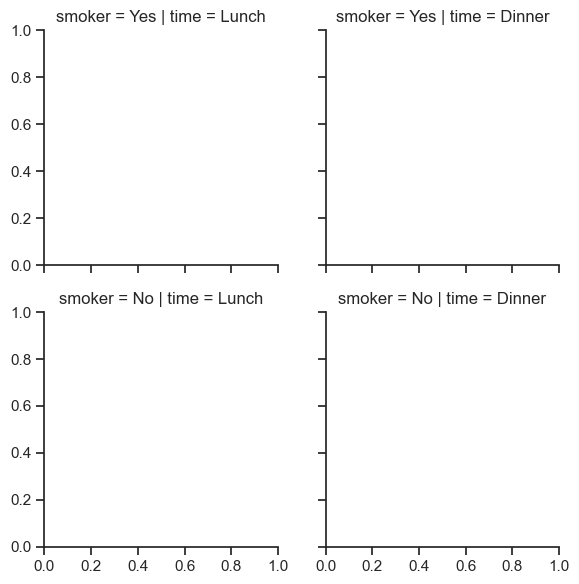

In [120]:
# a very simple example of the Facet grid by just showing the grid
fg = sns.FacetGrid(data=tips, col='time', row='smoker')

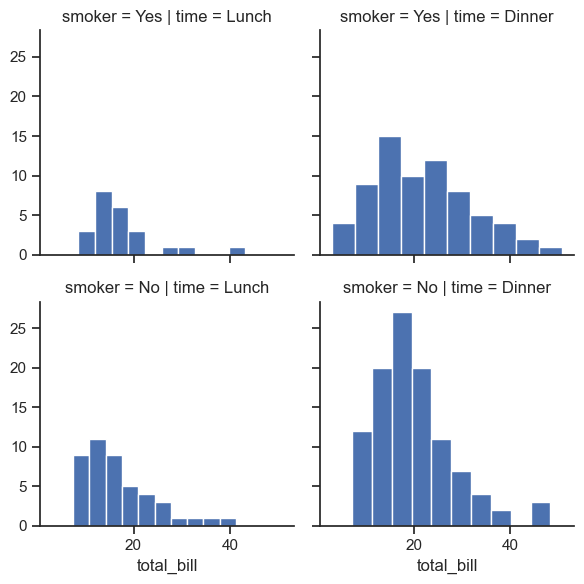

In [121]:
fg = sns.FacetGrid(data=tips, col="time", row="smoker")
fg = fg.map(plt.hist, "total_bill")

If you're trying to map a plot type that needs more than one argument, try the scatter plot, e.g. total bill VS tip

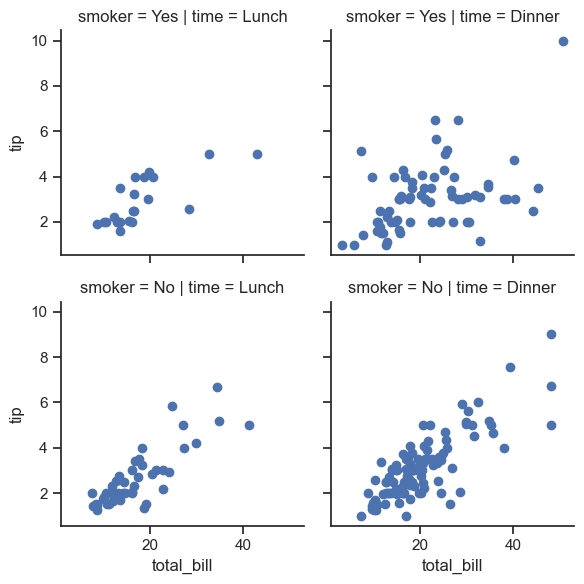

In [122]:
fg = sns.FacetGrid(data=tips, col='time', row='smoker' )
fg.map(plt.scatter, 'total_bill', 'tip')

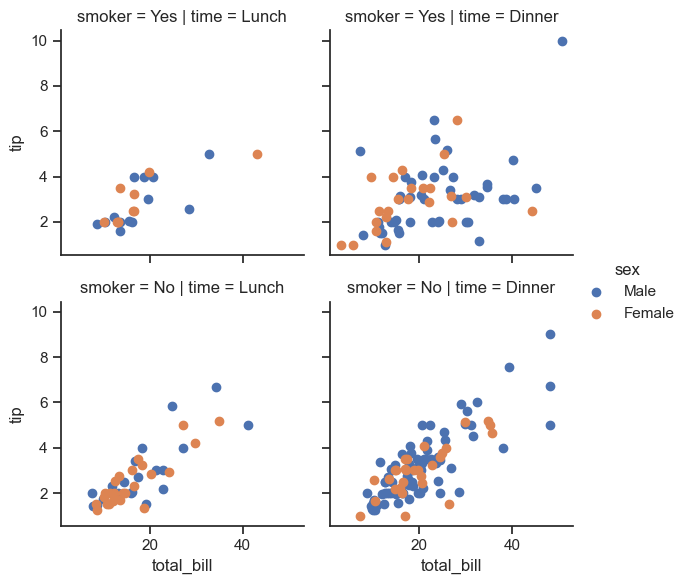

In [125]:
fg = sns.FacetGrid(tips, col="time", row="smoker", hue='sex')
fg = fg.map(plt.scatter, "total_bill", "tip").add_legend()

Seaborn's basic plotting capabilities are actually quite enough for us throughout the course. These sorts of grid functions are only here for you if you want to customize your plots even further.

## JointGrid

JointGrid is the general version for jointplot() type grids, for a quick example:

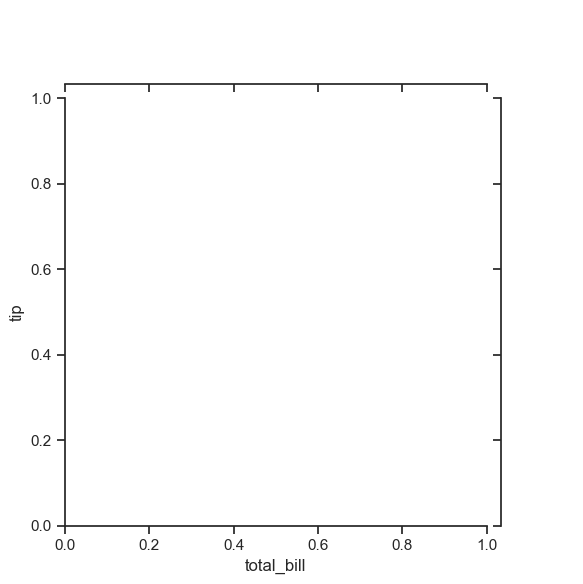

In [126]:
fg = sns.JointGrid(x="total_bill", y="tip", data=tips)

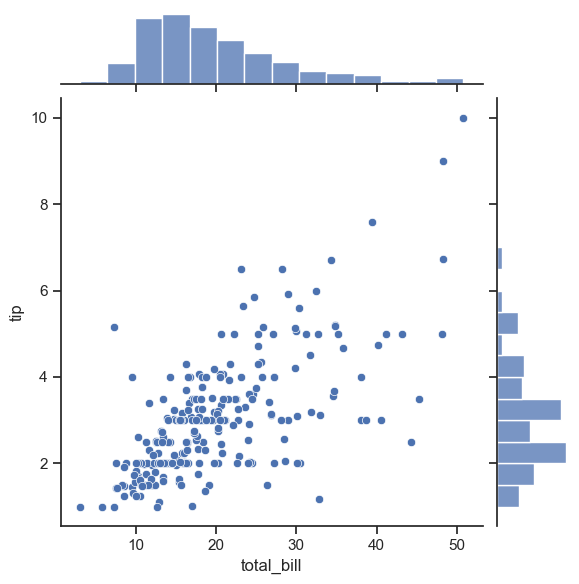

In [128]:
fg = sns.JointGrid(x="total_bill", y="tip", data=tips)
fg = fg.plot(sns.scatterplot, sns.histplot)

Reference the documentation as necessary for grid types, but most of the time you'll just use the easier plots discussed earlier.


## Style and Color

We've shown a few times how to control figure aesthetics in seaborn, but let's now go over it formally:

## Styles

You can set particular styles:

<Axes: xlabel='sex', ylabel='count'>

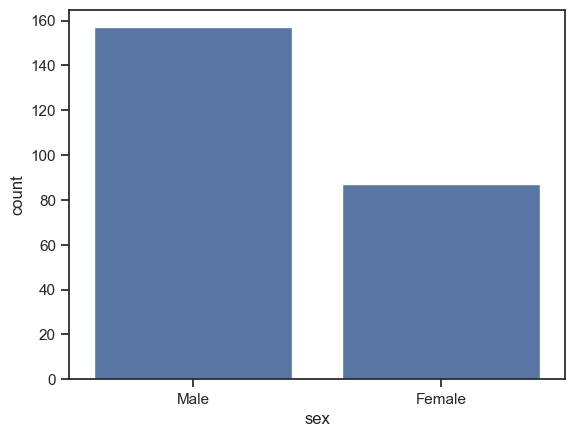

In [129]:
sns.countplot(data= tips, x='sex')

<Axes: xlabel='sex', ylabel='count'>

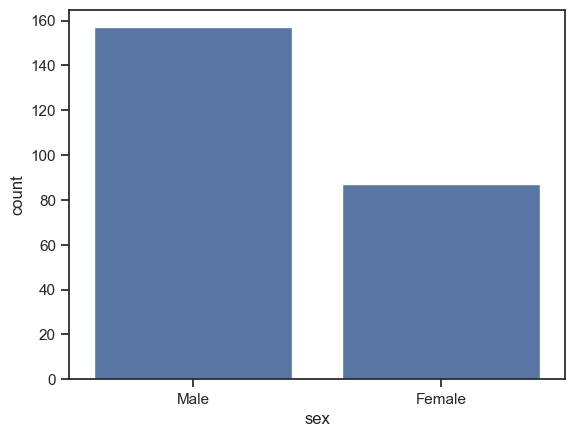

In [135]:
# seaborne has a set style arguments which allows to set the style for the rest of the plots.

# sns.set_style('darkgrid')
# sns.set_style('whitegrid')
# sns.set_style('white')
sns.set_style('ticks')

sns.countplot(data= tips, x = 'sex')


## Spine Removal

Another thing you can do is remove spines (the lines that define the boundary of the plot.)

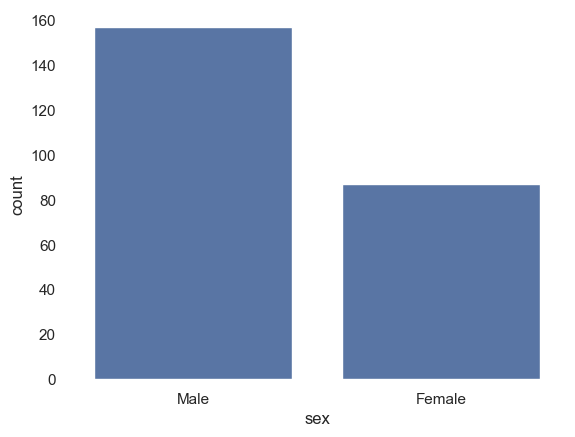

In [137]:
sns.set_style('white')
sns.countplot(data=tips, x='sex')

# sns.despine()

# by default top and right are true to be removed left and bottom or not to be removed.
sns.despine(left=True, bottom=True)


## Scale and Context

The set_context() allows you to set some parameters that control the scaling of plot elements. There are a few paper-size keywords (the default context is "notebook"), but parameters can be scaled independently. E.g. "poster" will scale the plot as if it is to be printed for a poster:

<Axes: xlabel='sex', ylabel='count'>

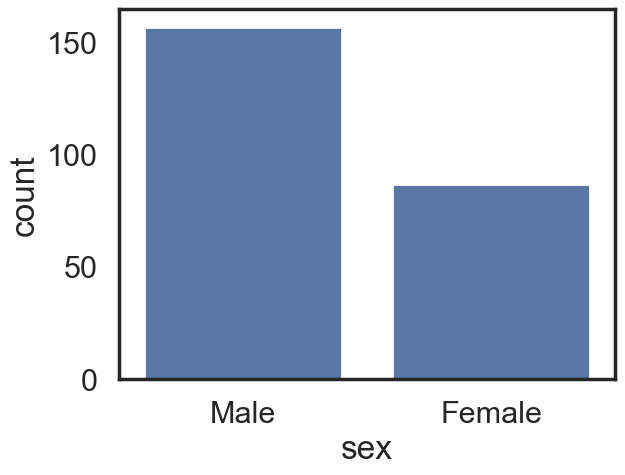

In [138]:
sns.set_context('poster')
sns.countplot(data=tips, x='sex')


<Axes: xlabel='sex', ylabel='count'>

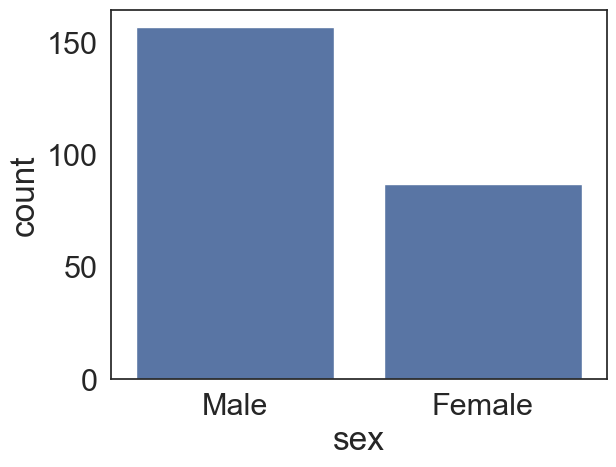

In [143]:
# sns.set_context('poster', font_scale=0.1)
sns.set_context("notebook", font_scale=2)
sns.countplot(data= tips, x='sex')

Check out the documentation page for more info on these topics:
https://stanford.edu/~mwaskom/software/seaborn/tutorial/aesthetics.html